In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [42]:
#https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
#We see zeroes as min values. This is impossible when it comes to features like "skin thickness, insulin, bmi, blood pressure, glucose".

In [7]:
columns_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [8]:
for col in columns_to_check:
    zero_count = (df[col] == 0).sum()

    percentage = zero_count * 100 / len(df)

    print(f"{col}: {zero_count}({percentage:.2f}%)")

Glucose: 5(0.65%)
BloodPressure: 35(4.56%)
SkinThickness: 227(29.56%)
Insulin: 374(48.70%)
BMI: 11(1.43%)


In [44]:
#Too many zeroes in columns like insulin and skin thickness

In [45]:
#EDA

In [46]:
#Diabetes pedigree function reveals the tendency of a human to being diabetes

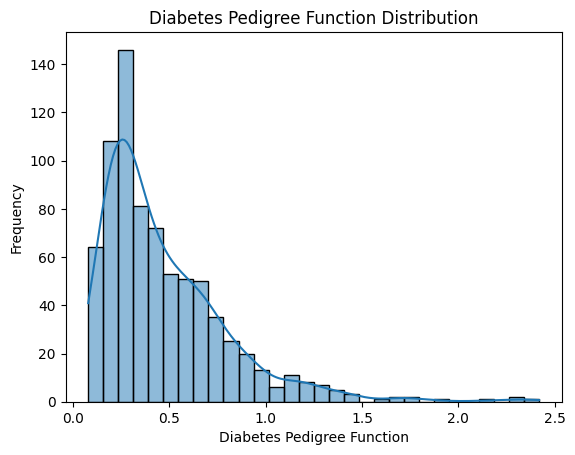

In [9]:
sns.histplot(df["DiabetesPedigreeFunction"], bins=30, kde=True)
plt.title("Diabetes Pedigree Function Distribution")
plt.ylabel("Frequency")
plt.xlabel("Diabetes Pedigree Function")
plt.show()

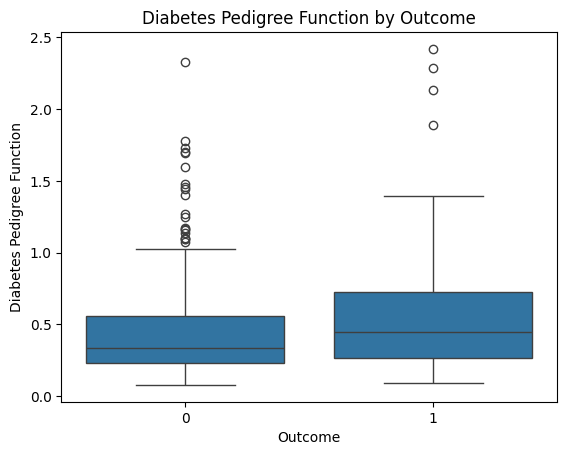

In [10]:
sns.boxplot(data=df, x="Outcome", y="DiabetesPedigreeFunction")
plt.title("Diabetes Pedigree Function by Outcome")
plt.ylabel("Diabetes Pedigree Function")
plt.xlabel("Outcome")
plt.show()

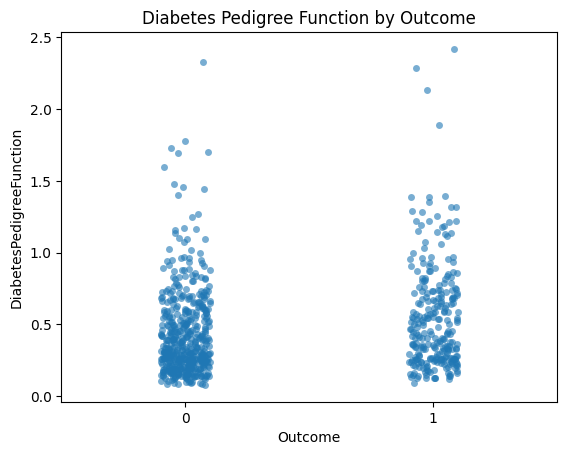

In [11]:
sns.stripplot(data=df, x="Outcome", y="DiabetesPedigreeFunction", jitter=True, alpha=0.6)
plt.title("Diabetes Pedigree Function by Outcome")
plt.show()

In [47]:
#Defining our train and test datasets

In [12]:
X = df.drop("Outcome", axis=1)

y = df["Outcome"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, test_size=0.2)

In [48]:
#Let's fill the null values with medians

In [15]:
columns_to_check

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [16]:
columns_to_fill = columns_to_check

In [17]:
medians = {}

for col in columns_to_fill:
    median_value = X_train[X_train[col] != 0][col].median()
    medians[col] = median_value
    X_train[col] = X_train[col].replace(0, median_value)

for col in columns_to_fill:
    X_test[col] = X_test[col].replace(0, medians[col])

In [18]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.907166,121.560261,72.612378,29.040717,142.477199,32.448208,0.469948,33.285016
std,3.385438,29.974412,12.165642,8.312217,80.879330,6.862948,0.328516,11.678337
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,25.000000,125.000000,27.600000,0.238250,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.370500,29.000000
75%,6.000000,139.750000,80.000000,32.000000,130.000000,36.500000,0.630750,40.000000
max,17.000000,199.000000,122.000000,63.000000,680.000000,67.100000,2.420000,81.000000


In [49]:
#Now our data has no zeroes in the columns where zero directly means "null value".

In [19]:
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.597403,122.038961,71.487013,29.376623,144.402597,32.483117,0.479565,33.064935
std,3.304818,32.320876,11.813495,10.513035,104.291511,6.946159,0.343303,12.118519
min,0.000000,61.000000,30.000000,7.000000,23.000000,18.400000,0.078000,21.000000
25%,1.000000,95.250000,64.000000,23.250000,108.250000,26.925000,0.254000,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.376500,28.000000
75%,5.750000,142.750000,80.000000,33.750000,129.500000,36.950000,0.603750,41.000000
max,13.000000,197.000000,106.000000,99.000000,846.000000,55.000000,2.329000,69.000000


In [51]:
#Scaling the data. Not necessary for Tree algorithms but required for other classification models. An unnecessary scaling does not harm the model performance, so we can always keep it there as a best practice.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [52]:
#Adaboost Classifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [23]:
ada = AdaBoostClassifier()

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7532467532467533
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.58      0.63      0.60        46

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.76       154

[[87 21]
 [17 29]]


In [53]:
#Hyperparameter tuning

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {
    "n_estimators": [50, 70, 100, 120, 150, 200],
    "learning_rate": [0.001, 0.01, 0.1, 1, 10]
}

In [26]:
grid = GridSearchCV(estimator=AdaBoostClassifier(), cv=5, n_jobs=-1, param_grid=param_grid, verbose=1)

In [27]:
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [28]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7597402597402597
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.59      0.65      0.62        46

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154

[[87 21]
 [16 30]]


In [30]:
#More Models

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
param_grid = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

grid = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=3, n_jobs=-1, scoring="accuracy")

In [35]:
import warnings

warnings.filterwarnings("ignore")

In [36]:
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7402597402597403
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.57      0.57      0.57        46

    accuracy                           0.74       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.74      0.74      0.74       154

[[88 20]
 [20 26]]


In [37]:
from sklearn.svm import SVC

In [38]:
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma" : ["scale", "auto"]
}

In [39]:
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=3, n_jobs=-1, scoring="accuracy")

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7597402597402597
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       108
           1       0.61      0.54      0.57        46

    accuracy                           0.76       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.75      0.76      0.76       154

[[92 16]
 [21 25]]


In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7207792207792207
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       108
           1       0.53      0.57      0.55        46

    accuracy                           0.72       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.73      0.72      0.72       154

[[85 23]
 [20 26]]
